In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import itertools
import seaborn as sns
import geopandas as gpd
from shapely.ops import unary_union
import geoplot

### Indicating results folders and creating labels for transmission cost structure

In [2]:
mainpath = '/Users/Kucuksayacigil/Dropbox/UCSD Postdoc/'
resultpath = mainpath + '/Results/Reference cost/'
data_repository = '/Users/Kucuksayacigil/Desktop/WECC-data/'

In [121]:
inputfolder_1 = mainpath + '/Data/6-week data/Reference cost'
inputfolder_2 = data_repository + '/extra_inputs'

resfol = [
          resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_nosensitivity (no proposed line)',
          resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_recodedupglinear (no proposed line)',
          resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_recodednewlinear (no proposed line)',
          resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_linear (no proposed line)',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_nosensitivity (11 late-stage proposed lines)',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_recodedupglinear (11 late-stage proposed lines)',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_recodednewlinear (11 late-stage proposed lines)',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_linear (11 late-stage proposed lines)',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_nosensitivity',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_recodedupglinear',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_recodednewlinear',
#           resultpath + 'Results_m2050_tbaseline_pregionalces_rregionalized_linear'
         ]

# rf_no_nonlinear = 
# rf_no_recodedupg = 
# rf_no_recodednew = 
# rf_no_linear = 

# rf_no = [rf_no_nonlinear, rf_no_recodedupg, rf_no_recodednew, rf_no_linear]

# rf_ten_nonlinear = 
# rf_ten_recodedupg = 
# rf_ten_recodednew = 
# rf_ten_linear = 

# rf_no = [rf_ten_nonlinear, rf_ten_recodedupg, rf_ten_recodednew, rf_ten_linear]

# rf_all_nonlinear = 
# rf_all_recodedupg = 
# rf_all_recodednew = 
# rf_all_linear = 

# rf_no = [rf_all_nonlinear, rf_all_recodedupg, rf_all_recodednew, rf_all_linear]

In [122]:
structure_names = []
for x in resfol:
    if x.split('/')[-1].split('_')[-1].split(' ')[0] == 'linear':
        label = 'Linear (PowerGenome)'
    elif x.split('/')[-1].split('_')[-1].split(' ')[0] == 'recodednewlinear':
        label = 'Linear (only new)'
    elif x.split('/')[-1].split('_')[-1].split(' ')[0] == 'recodedupglinear':
        label = 'Linear (new and upgrade)'
    elif x.split('/')[-1].split('_')[-1].split(' ')[0] == 'nosensitivity':
        label = 'Affine'
    
    structure_names.append(label)

### Figure parameters

In [5]:
fig1 = 15
fig2 = 9
fs = 16
dpi_qual = 300

### Reading results

In [6]:
def prepare_dataframe(path, namedf):
    data = pd.read_csv(os.path.join(path, namedf))
    data = data.transpose()
    data.columns = data.iloc[0] 
    data = data[1:]
    data = data / 1000
    return data

In [7]:
def prepare_dataframe2(path, namedf, unnecessary_rows):
    data = pd.read_csv(os.path.join(path, namedf))
    data.drop(data.tail(unnecessary_rows).index, inplace = True)
    del data['Index']
    data = data.set_index('Path')
    data = data / 1000
    return data

In [123]:
aggregated_cap = [prepare_dataframe(resfol[0], "allcap_aggregate.csv"), 
                  prepare_dataframe(resfol[1], "allcap_aggregate.csv"),
                  prepare_dataframe(resfol[2], "allcap_aggregate.csv"), 
                  prepare_dataframe(resfol[3], "allcap_aggregate.csv")]

# aggregated_cap_no_nonlinear = prepare_dataframe(rf[0], "allcap_aggregate.csv")
# aggregated_cap_no_recodedupg = prepare_dataframe(rf[1], "allcap_aggregate.csv")
# aggregated_cap_no_recodednew = prepare_dataframe(rf[2], "allcap_aggregate.csv")
# aggregated_cap_no_linear = prepare_dataframe(rf[3], "allcap_aggregate.csv")

# aggregated_cap_no = [aggregated_cap_no_nonlinear, aggregated_cap_no_recodedupg,
#                      aggregated_cap_no_recodednew, aggregated_cap_no_linear]

# aggregated_cap_ten_nonlinear = prepare_dataframe(rf_ten_nonlinear, "allcap_aggregate.csv")
# aggregated_cap_ten_recodedupg = prepare_dataframe(rf_ten_recodedupg, "allcap_aggregate.csv")
# aggregated_cap_ten_recodednew = prepare_dataframe(rf_ten_recodednew, "allcap_aggregate.csv")
# aggregated_cap_ten_linear = prepare_dataframe(rf_ten_linear, "allcap_aggregate.csv")

# aggregated_cap_no = [aggregated_cap_ten_nonlinear, aggregated_cap_ten_recodedupg,
#                      aggregated_cap_ten_recodednew, aggregated_cap_ten_linear]

# aggregated_cap_all_nonlinear = prepare_dataframe(rf_all_nonlinear, "allcap_aggregate.csv")
# aggregated_cap_all_recodedupg = prepare_dataframe(rf_all_recodedupg, "allcap_aggregate.csv")
# aggregated_cap_all_recodednew = prepare_dataframe(rf_all_recodednew, "allcap_aggregate.csv")
# aggregated_cap_all_linear = prepare_dataframe(rf_all_linear, "allcap_aggregate.csv")

# aggregated_cap_no = [aggregated_cap_all_nonlinear, aggregated_cap_all_recodedupg,
#                      aggregated_cap_all_recodednew, aggregated_cap_all_linear]

network = pd.read_csv(os.path.join(inputfolder_1, "Network.csv"))

pronetwork = pd.read_csv(os.path.join(inputfolder_2, "new_transmission_lines.csv"))

upgrade_nonlinear = pd.read_csv(os.path.join(resfol[0], "vCAPUPDATE_results.csv"))
upgrade_nonlinear.OptVal = upgrade_nonlinear.OptVal / 1000
newlineres_nonlinear = pd.read_csv(os.path.join(resfol[0], "newline_investment_results.csv"))
newlineres_nonlinear[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] = newlineres_nonlinear[['vCAPNEWAC', 'vNUMNEWAC', 'vCAPNEWDC', 'vNUMNEWDC']] / 1000

tline_cap_recodedupg = prepare_dataframe2(resfol[1], "vCAPLINE_results.csv", len(pronetwork))
upgcap_recodedupg = pd.read_csv(os.path.join(resfol[1], "vCAPUPGLINR_results.csv"))
upgcap_recodedupg.OptValues = upgcap_recodedupg.OptValues / 1000
upgcap_recodedupg = upgcap_recodedupg.set_index('Path')
upgcap_recodedupg = upgcap_recodedupg.rename(columns = {'OptValues':'Linear (new and upgrade) upgrade'})
del upgcap_recodedupg['Index']

tline_cap_recodednew = prepare_dataframe2(resfol[2], "vCAPLINE_results.csv", len(pronetwork))
tline_cap_linear = prepare_dataframe2(resfol[3], "vCAPLINE_results.csv", len(pronetwork))

# cost_no_nonlinear = pd.read_csv(os.path.join(rf_no_nonlinear, "cost_components.csv"))
# cost_no_recodedupg = pd.read_csv(os.path.join(rf_no_recodedupg, "cost_components.csv"))
# cost_no_recodednew = pd.read_csv(os.path.join(rf_no_recodednew, "cost_components.csv"))
# cost_no_linear = pd.read_csv(os.path.join(rf_no_linear, "cost_components.csv"))

# cost_no = [cost_no_nonlinear, cost_no_recodedupg, cost_no_recodednew, cost_no_linear]

cost = [pd.read_csv(os.path.join(resfol[0], "cost_components.csv")),
        pd.read_csv(os.path.join(resfol[1], "cost_components.csv")),
        pd.read_csv(os.path.join(resfol[2], "cost_components.csv")),
        pd.read_csv(os.path.join(resfol[3], "cost_components.csv"))]

wecczone_shapes = gpd.read_file(os.path.join(data_repository, "../wecczone_shapes/wecczone_shapes.shp"))
states_shape = gpd.read_file(os.path.join(data_repository, "state_shape/cb_2018_us_state_20m.shp"))

voltages_lines = pd.read_csv(os.path.join(inputfolder_2, "voltages_lines.csv"))

numupgrade_nonlinear = pd.read_csv(os.path.join(resfol[0], "vNUMUPDATE_results.csv"))
numupgrade_nonlinear = numupgrade_nonlinear[numupgrade_nonlinear['OptVal'] >= 0.001]
numupgrade_nonlinear['OptVal'] = numupgrade_nonlinear['OptVal'].round(0).astype(int)

### Solar and wind capacities in cost structures

In [9]:
ymax = 0
for x in enumerate(structure_names):
    if ymax < aggregated_cap[x[0]][['SOLAR', 'WIND']].sum(axis=1).max():
        ymax = aggregated_cap[x[0]][['SOLAR', 'WIND']].sum(axis=1).max()

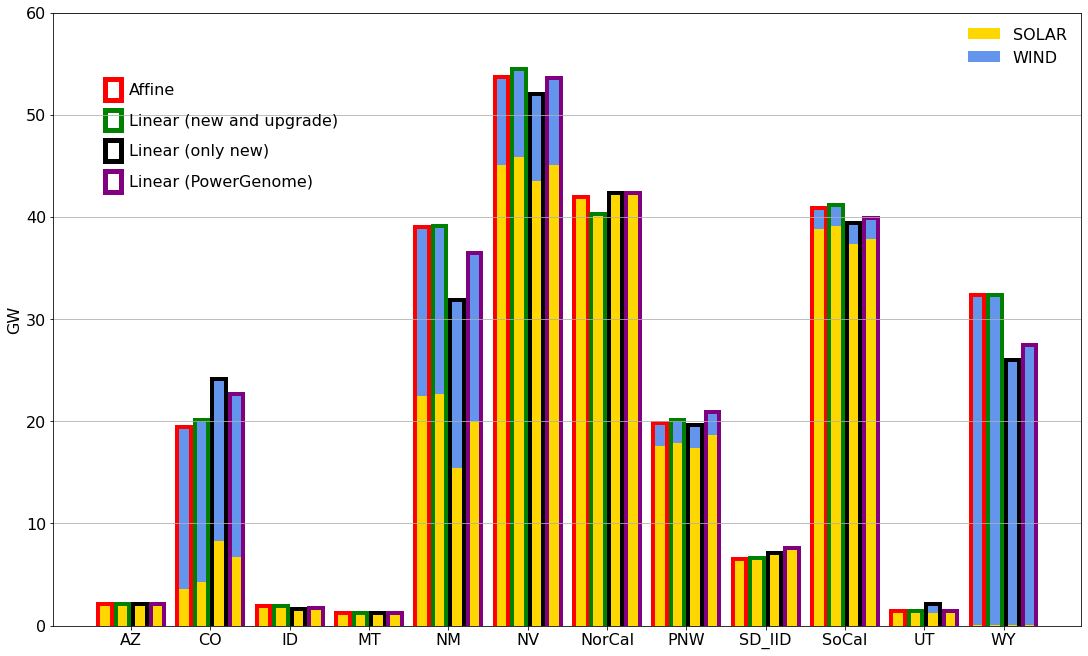

In [71]:
ind = np.arange(len(aggregated_cap[0]))

bar_width = 0.12
bar_space = 0.22
linew = 8
color_structures = ['red', 'green', 'black', 'purple']

fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2), constrained_layout = True)

for x in range(0, len(aggregated_cap)):
    
    ax.bar(ind + bar_space * x, aggregated_cap[x].SOLAR + aggregated_cap[x].WIND, 
           width = bar_width, label = '', color = 'white', edgecolor = color_structures[x], 
           linewidth = linew)
    string_label = 'SOLAR' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap[x].SOLAR, width = bar_width, label = string_label, 
           color = 'gold')
    string_label = 'WIND' if x == 0 else ''
    ax.bar(ind + bar_space * x, aggregated_cap[x].WIND, width = bar_width, label = string_label, 
           color = 'cornflowerblue', bottom = aggregated_cap[x].SOLAR)
    
ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = fs)
ax.yaxis.grid()
ax.set_xticks(ind + 3 * bar_space / 2)
ax.set_xticklabels(aggregated_cap[0].index)
ax.legend(fontsize = fs, frameon = False)
# ax.set_ylim(0, ymax + 10)
ax.set_ylim(0, 60)

for x in range(0, len(aggregated_cap)):
    ax.add_patch(Rectangle((0, ymax + 5 - 3 * x), 0.2, 2, fc = 'none', ec = color_structures[x], lw = 5))
    ax.text(0.3, ymax + 5.5 - 3 * x, structure_names[x], fontsize = fs)

plt.savefig(os.path.join(resultpath, "../Transmission paper/solar_wind_structures_all.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Transmission path and capacities in cost structure

In [85]:
existing_network = network[['transmission_path_name', 'Line_Max_Flow_MW']]
existing_network = existing_network.rename(columns = {'Line_Max_Flow_MW':'Existing'})

In [86]:
proposed_network = pronetwork[['transmission_path_name', 'Line_Max_Flow_MW']]
proposed_network = proposed_network.groupby('transmission_path_name').sum()
proposed_network.reset_index(inplace = True)
proposed_network = proposed_network.rename(columns = {'index':'transmission_path_name'})
proposed_network = proposed_network.rename(columns = {'Line_Max_Flow_MW':'Proposed'})

In [87]:
expro = pd.merge(existing_network, proposed_network, how = 'outer', on = 'transmission_path_name')
expro = expro.rename(columns = {'transmission_path_name':'Path'})
expro = expro.set_index('Path')
expro = expro / 1000

#### Affine (fixed + variable costs, new and upgrade)

In [88]:
expro['230 kV AC to 345 kV AC'] = list(itertools.repeat(0, len(expro)))
expro['230 kV AC to 500 kV AC'] = list(itertools.repeat(0, len(expro)))
expro['230 kV AC to 500 kV DC'] = list(itertools.repeat(0, len(expro)))
expro['345 kV AC to 500 kV AC'] = list(itertools.repeat(0, len(expro)))
expro['345 kV AC to 500 kV DC'] = list(itertools.repeat(0, len(expro)))
expro['500 kV AC to 500 kV DC'] = list(itertools.repeat(0, len(expro)))
expro['New AC Line'] = list(itertools.repeat(0, len(expro)))
expro['New DC Line'] = list(itertools.repeat(0, len(expro)))

for index, row in upgrade_nonlinear.loc[(upgrade_nonlinear['FromVol'] == 1) & (upgrade_nonlinear['ToVol'] == 2)].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, '230 kV AC to 345 kV AC'] = row['OptVal']

for index, row in upgrade_nonlinear.loc[(upgrade_nonlinear['FromVol'] == 1) & (upgrade_nonlinear['ToVol'] == 3)].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, '230 kV AC to 500 kV AC'] = row['OptVal']

for index, row in upgrade_nonlinear.loc[(upgrade_nonlinear['FromVol'] == 1) & (upgrade_nonlinear['ToVol'] == 4)].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, '230 kV AC to 500 kV DC'] = row['OptVal']

for index, row in upgrade_nonlinear.loc[(upgrade_nonlinear['FromVol'] == 2) & (upgrade_nonlinear['ToVol'] == 3)].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, '345 kV AC to 500 kV AC'] = row['OptVal']

for index, row in upgrade_nonlinear.loc[(upgrade_nonlinear['FromVol'] == 2) & (upgrade_nonlinear['ToVol'] == 4)].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, '345 kV AC to 500 kV DC'] = row['OptVal']

for index, row in upgrade_nonlinear.loc[(upgrade_nonlinear['FromVol'] == 3) & (upgrade_nonlinear['ToVol'] == 4)].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, '500 kV AC to 500 kV DC'] = row['OptVal']

for index, row in newlineres_nonlinear.loc[newlineres_nonlinear['vCAPNEWAC'] != 0].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, 'New AC Line'] = row['vCAPNEWAC']

for index, row in newlineres_nonlinear.loc[newlineres_nonlinear['vCAPNEWDC'] != 0].iterrows():
    for index1, row1 in expro.iterrows():
        if row['Path'] == index1:
            expro.at[index1, 'New DC Line'] = row['vCAPNEWDC']

#### Linear (new and upgrade)

In [89]:
expro = pd.merge(expro, tline_cap_recodedupg, how = 'outer', on = 'Path')
expro = pd.merge(expro, upgcap_recodedupg, how = 'outer', on = 'Path')
expro = expro.fillna(0)
expro['Linear (new and upgrade) new'] = expro.OptValues - expro.Existing - expro['Linear (new and upgrade) upgrade']
del expro['OptValues']

#### Linear (only new)

In [90]:
expro = pd.merge(expro, tline_cap_recodednew, how = 'outer', on = 'Path')
expro = expro.fillna(0)
expro['Linear (only new)'] = expro.OptValues - expro.Existing
del expro['OptValues']

#### Linear (PowerGenome)

In [91]:
expro = pd.merge(expro, tline_cap_linear, how = 'outer', on = 'Path')
expro = expro.fillna(0)
expro['Linear (PowerGenome)'] = expro.OptValues - expro.Existing
del expro['OptValues']

In [39]:
# del expro['Existing']
# del expro['Proposed']

In [79]:
# expro = expro.loc[(expro != 0).any(axis = 1)]

In [92]:
expro['Affine'] = expro['230 kV AC to 345 kV AC'] + expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + expro['500 kV AC to 500 kV DC'] + expro['New AC Line'] + expro['New DC Line']
expro['Linear (new and upgrade)'] = expro['Linear (new and upgrade) upgrade'] + expro['Linear (new and upgrade) new']     

#### Figure creation

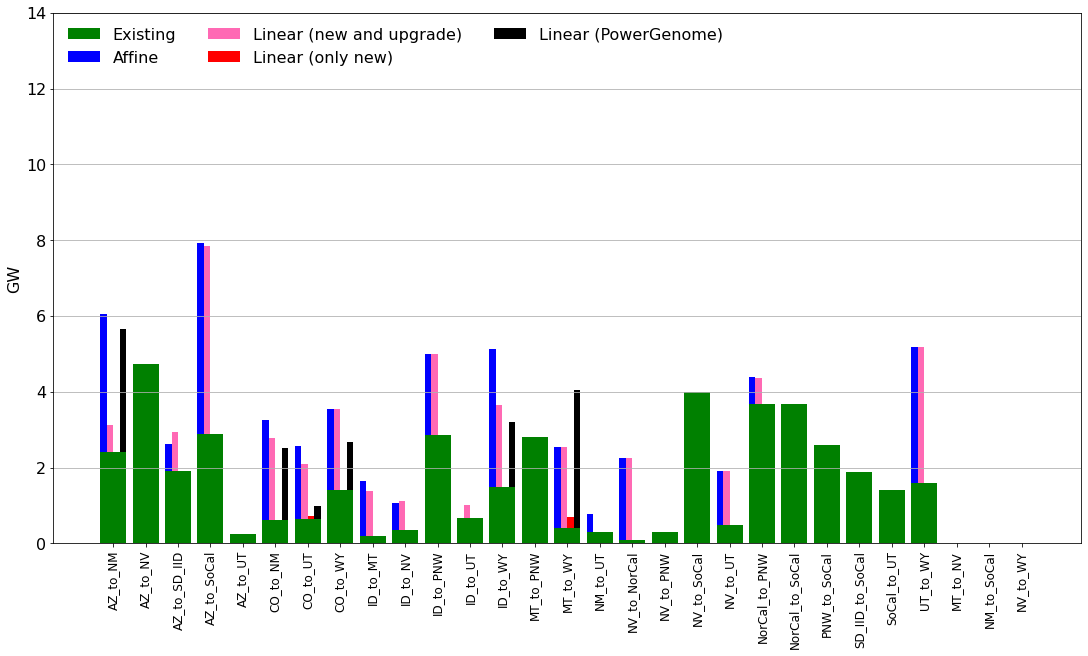

In [93]:
add_proposed = False

ind = np.arange(len(expro))

# bar_width = 0.14
bar_space = 0.20
# linew = 8
# color_structures = ['red', 'green', 'black', 'purple']

fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2), constrained_layout = True)
    
for x in range(0, len(aggregated_cap)):
    
    if x == 0:
        ax.bar(ind + bar_space * x, expro.Existing, width = bar_space, label = 'Existing', color = 'green')
        if add_proposed == True:
            ax.bar(ind + bar_space * x, expro.Proposed, width = bar_space, label = 'Proposed', color = 'orange', 
               bottom = expro.Existing)
    else:
        ax.bar(ind + bar_space * x, expro.Existing, width = bar_space, label = '', color = 'green')
        if add_proposed == True:
            ax.bar(ind + bar_space * x, expro.Proposed, width = bar_space, label = '', color = 'orange', 
               bottom = expro.Existing)

    if x == 0:
        if add_proposed == False:
            ax.bar(ind + bar_space * x, expro['Affine'], width = bar_space, label = 'Affine', 
               color = 'blue', bottom = expro.Existing)
#             string_label = 'Affine (230 kV AC to 345 kV AC)' if sum(expro['230 kV AC to 345 kV AC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['230 kV AC to 345 kV AC'], width = bar_space, label = string_label, 
#                color = 'black', bottom = expro.Existing)

#             string_label = 'Affine (230 kV AC to 500 kV AC)' if sum(expro['230 kV AC to 500 kV AC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['230 kV AC to 500 kV AC'], width = bar_space, label = string_label, 
#                color = 'blue', bottom = expro.Existing + expro['230 kV AC to 345 kV AC'])

#             string_label = 'Affine (230 kV AC to 500 kV DC)' if sum(expro['230 kV AC to 500 kV DC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['230 kV AC to 500 kV DC'], width = bar_space, label = string_label, 
#                 color = 'yellow', bottom = expro.Existing + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'])

#             string_label = 'Affine (345 kV AC to 500 kV AC)' if sum(expro['345 kV AC to 500 kV AC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['345 kV AC to 500 kV AC'], width = bar_space, label = string_label, 
#                 color = 'gray', bottom = expro.Existing + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'])

#             string_label = 'Affine (345 kV AC to 500 kV DC)' if sum(expro['345 kV AC to 500 kV DC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['345 kV AC to 500 kV DC'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'])

#             string_label = 'Affine (500 kV AC to 500 kV DC)' if sum(expro['500 kV AC to 500 kV DC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['500 kV AC to 500 kV DC'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'])

#             string_label = 'Affine (New AC Line)' if sum(expro['New AC Line']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['New AC Line'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
#                    expro['500 kV AC to 500 kV DC'])

#             string_label = 'Affine (New DC Line)' if sum(expro['New DC Line']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['New DC Line'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
#                    expro['500 kV AC to 500 kV DC'] + expro['New AC Line'])
        else:
            ax.bar(ind + bar_space * x, expro['Affine'], width = bar_space, label = 'Affine', 
               color = 'blue', bottom = expro.Existing + expro.Proposed)
#             string_label = 'Affine (230 kV AC to 345 kV AC)' if sum(expro['230 kV AC to 345 kV AC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['230 kV AC to 345 kV AC'], width = bar_space, label = string_label, 
#                color = 'black', bottom = expro.Existing + expro.Proposed)

#             string_label = 'Affine (230 kV AC to 500 kV AC)' if sum(expro['230 kV AC to 500 kV AC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['230 kV AC to 500 kV AC'], width = bar_space, label = string_label, 
#                color = 'blue', bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'])

#             string_label = 'Affine (230 kV AC to 500 kV DC)' if sum(expro['230 kV AC to 500 kV DC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['230 kV AC to 500 kV DC'], width = bar_space, label = string_label, 
#                 color = 'yellow', bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'])

#             string_label = 'Affine (345 kV AC to 500 kV AC)' if sum(expro['345 kV AC to 500 kV AC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['345 kV AC to 500 kV AC'], width = bar_space, label = string_label, 
#                 color = 'gray', bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'])

#             string_label = 'Affine (345 kV AC to 500 kV DC)' if sum(expro['345 kV AC to 500 kV DC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['345 kV AC to 500 kV DC'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'])

#             string_label = 'Affine (500 kV AC to 500 kV DC)' if sum(expro['500 kV AC to 500 kV DC']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['500 kV AC to 500 kV DC'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'])

#             string_label = 'Affine (New AC Line)' if sum(expro['New AC Line']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['New AC Line'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
#                    expro['500 kV AC to 500 kV DC'])

#             string_label = 'Affine (New DC Line)' if sum(expro['New DC Line']) != 0 else ''
#             ax.bar(ind + bar_space * x, expro['New DC Line'], width = bar_space, label = string_label, 
#                bottom = expro.Existing + expro.Proposed + expro['230 kV AC to 345 kV AC'] + 
#                    expro['230 kV AC to 500 kV AC'] + expro['230 kV AC to 500 kV DC'] + 
#                    expro['345 kV AC to 500 kV AC'] + expro['345 kV AC to 500 kV DC'] + 
#                    expro['500 kV AC to 500 kV DC'] + expro['New AC Line'])
    elif x == 1:
        if add_proposed == False:
            ax.bar(ind + bar_space * x, expro['Linear (new and upgrade)'], width = bar_space, 
                   label = 'Linear (new and upgrade)', color = 'hotpink', 
                   bottom = expro.Existing)
#             ax.bar(ind + bar_space * x, expro['Linearized for New and Upgrade (Upgrade)'], width = bar_space, 
#                    label = 'Linear (only upgrade)', color = 'hotpink', 
#                    bottom = expro.Existing)
#             ax.bar(ind + bar_space * x, expro['Linearized for New and Upgrade (New)'], width = bar_space, 
#                    label = 'Linear (only new)', color = 'purple', 
#                bottom = expro.Existing + expro['Linearized for New and Upgrade (Upgrade)'])
        else:
            ax.bar(ind + bar_space * x, expro['Linear (new and upgrade)'], width = bar_space, 
                   label = 'Linear (new and upgrade)', color = 'hotpink', 
                   bottom = expro.Existing + expro.Proposed)
#             ax.bar(ind + bar_space * x, expro['Linearized for New and Upgrade (Upgrade)'], width = bar_space, 
#                    label = 'Linear (only upgrade)', color = 'hotpink', 
#                    bottom = expro.Existing + expro.Proposed)
#             ax.bar(ind + bar_space * x, expro['Linearized for New and Upgrade (New)'], width = bar_space, 
#                    label = 'Linear (only new)', color = 'purple', 
#                bottom = expro.Existing + expro.Proposed + expro['Linearized for New and Upgrade (Upgrade)'])
    elif x == 2:
        if add_proposed == False:
            ax.bar(ind + bar_space * x, expro['Linear (only new)'], width = bar_space, 
                   label = 'Linear (only new)', color = 'red', bottom = expro.Existing)
        else:
            ax.bar(ind + bar_space * x, expro['Linear (only new)'], width = bar_space, 
                   label = 'Linear (only new)', color = 'red', bottom = expro.Existing + expro.Proposed)
    elif x == 3:
        if add_proposed == False:
            ax.bar(ind + bar_space * x, expro['Linear (PowerGenome)'], width = bar_space, 
                   label = 'Linear (PowerGenome)', color = 'black', bottom = expro.Existing)
        else:
            ax.bar(ind + bar_space * x, expro['Linear (PowerGenome)'], width = bar_space, 
                   label = 'Linear (PowerGenome)', color = 'black', bottom = expro.Existing + expro.Proposed)

ax.set_ylabel('GW', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = fs)
ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
ax.yaxis.grid()
ax.set_xticks(ind + 3 * bar_space / 2)
ax.set_xticklabels(expro.index)
ax.legend(fontsize = fs, frameon = False, ncol = 3, loc = 'upper left')
# ax.set_ylim(0, 10)
ax.set_ylim(0, 14)

# for x in range(0, len(aggregated_cap_no)):
#     ax.add_patch(Rectangle((0, 7 - 1 * x), 0.2, 2, fc = 'none', ec = color_structures[x], lw = 5))
#     ax.text(0.3, 7.5 - 1 * x, structure_names[x], fontsize = fs)

plt.savefig(os.path.join(resultpath, "../Transmission paper/transmission_expansion_structures_no.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Cost comparison

In [107]:
cost_breakdown = pd.DataFrame()

generation_cost, storage_cost, line_cost, variable_cost = [], [], [], [] 
for x in enumerate(structure_names):
    generation_cost.append(cost[x[0]][cost[x[0]].Component == 'eFixCostGen']['Values'].values[0])
    storage_cost.append(cost[x[0]][cost[x[0]].Component == 'eFixCostStor']['Values'].values[0])
    line_cost.append(cost[x[0]][cost[x[0]].Component == 'eFixCostLine']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eNewACCost']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eNewDCCost']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eACtoACUpgradeCost']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eACtoDCUpgradeCost_1']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eACtoDCUpgradeCost_2']['Values'].values[0])
    variable_cost.append(cost[x[0]][cost[x[0]].Component == 'eVarCostGen']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eNSECosts']['Values'].values[0] + 
                     cost[x[0]][cost[x[0]].Component == 'eStartCostUC']['Values'].values[0])
    
cost_breakdown['Generation'] = generation_cost
cost_breakdown['Storage'] = storage_cost
cost_breakdown['Transmission'] = line_cost
cost_breakdown['Variable'] = variable_cost

cost_breakdown.index = structure_names

cost_breakdown = cost_breakdown * 10000 / 1000000000

In [108]:
cost_breakdown.sum(axis = 1)

Affine                      44.925255
Linear (new and upgrade)    44.918830
Linear (only new)           45.137557
Linear (PowerGenome)        42.380624
dtype: float64

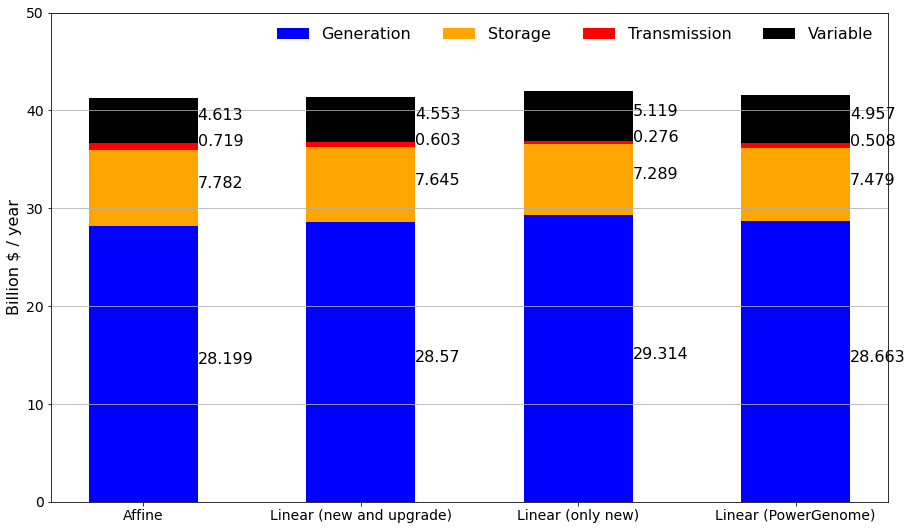

In [26]:
bar_width = 0.5

fig, ax = plt.subplots(1, 1, figsize = (fig1, fig2))

ax.bar(cost_breakdown.index, cost_breakdown.Generation, width = bar_width, label = 'Generation', color = 'blue')
ax.bar(cost_breakdown.index, cost_breakdown.Storage, width = bar_width, label = 'Storage', color = 'orange', 
   bottom = cost_breakdown.Generation)
ax.bar(cost_breakdown.index, cost_breakdown.Transmission, width = bar_width, label = 'Transmission', color = 'red', 
   bottom = cost_breakdown.Generation + cost_breakdown.Storage)
ax.bar(cost_breakdown.index, cost_breakdown.Variable, width = bar_width, label = 'Variable', color = 'black', 
   bottom = cost_breakdown.Generation + cost_breakdown.Storage + cost_breakdown.Transmission)

ax.set_ylabel('Billion $ / year', fontsize = fs)
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.set_ylim(0, 50)
ax.yaxis.grid()
ax.legend(fontsize = fs, frameon = False, ncol = 4)

for rowin in range(0, cost_breakdown.shape[0]):
    ax.text(rowin + 0.25, cost_breakdown.iloc[rowin]['Generation'] / 2, 
            round(cost_breakdown.iloc[rowin]['Generation'], 3), fontsize = fs)
    ax.text(rowin + 0.25, cost_breakdown.iloc[rowin]['Generation'] + cost_breakdown.iloc[rowin]['Storage'] / 2, 
            round(cost_breakdown.iloc[rowin]['Storage'], 3), fontsize = fs)
    ax.text(rowin + 0.25, cost_breakdown.iloc[rowin]['Generation'] + cost_breakdown.iloc[rowin]['Storage'] + 
            cost_breakdown.iloc[rowin]['Transmission'] / 2, round(cost_breakdown.iloc[rowin]['Transmission'], 3), 
            fontsize = fs)
    ax.text(rowin + 0.25, cost_breakdown.iloc[rowin]['Generation'] + cost_breakdown.iloc[rowin]['Storage'] + 
            cost_breakdown.iloc[rowin]['Transmission'] + cost_breakdown.iloc[rowin]['Variable'] / 2, 
            round(cost_breakdown.iloc[rowin]['Variable'], 3), fontsize = fs)

plt.savefig(os.path.join(resultpath, "../Transmission paper/cost_structures.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Main map

In [130]:
wecc_states = states_shape.loc[states_shape['NAME'].isin(['Oregon', 'Washington', 'Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California'])]
wecczone_shapes['WECC'] = np.repeat(1,len(wecczone_shapes))
wecczone_shapes = wecczone_shapes.reset_index()
wecczone_shapes = wecczone_shapes.rename(columns = {'index':'Regions'})

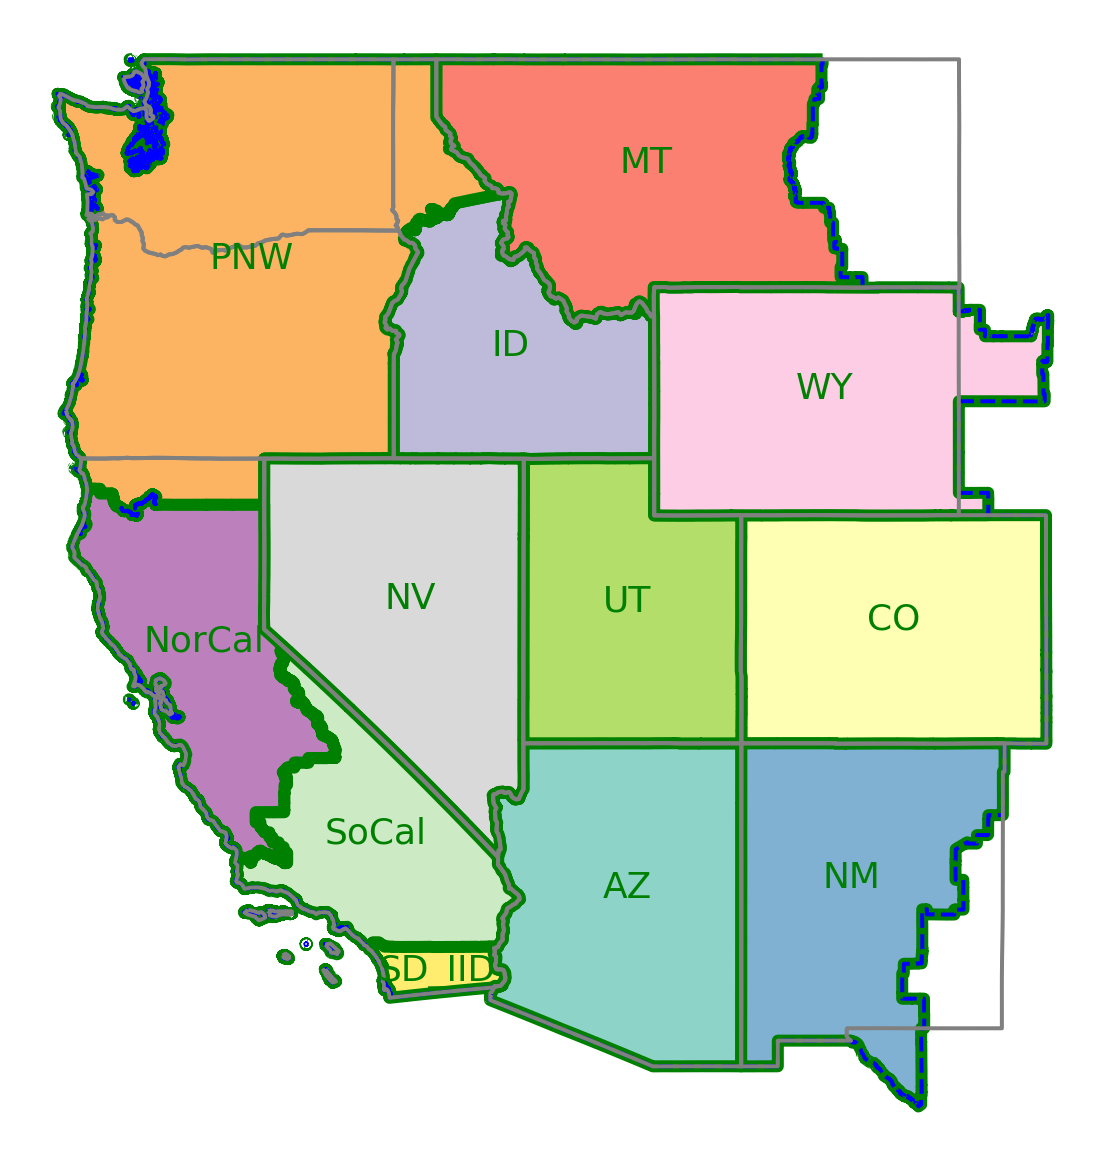

In [22]:
matplotlib.rcParams['font.size'] = 30

fig = plt.figure()

ax = fig.add_axes([0, 0, 4, 4])
wecczone_shapes.plot(ax = ax, cmap = 'Set3', edgecolor = 'green', linewidth = 12)
wecczone_shapes.loc[wecczone_shapes['WECC'] == 1].dissolve('WECC').plot(ax = ax, 
                    facecolor = 'none', edgecolor = 'blue', linewidth = 4, linestyle = '--') # facecolor = 'none' makes background none
wecc_states.plot(ax = ax, facecolor = 'none', edgecolor = 'gray', linewidth = 4)

for xy, label in zip(wecczone_shapes.geometry, wecczone_shapes.Regions):
    if label != 'SD_IID':
        ax.annotate(label, xy = xy.centroid.coords[0], fontsize = 36, ha = 'center', color = 'green',
                     bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})
    else:
        ax.annotate(label, xy = (xy.centroid.coords[0][0], xy.centroid.coords[0][1] - 0.2), 
                    fontsize = 36, ha = 'center', color = 'green',
                    bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})

ax.axis('off')

fig = fig.get_figure()
fig.savefig(os.path.join(resultpath, "../Transmission paper/modeling_zones.pdf"))

### Proposed transmission lines

In [112]:
proposed_status = pronetwork[['transmission_path_name', 'Status']]
proposed_status = proposed_status.set_index('transmission_path_name')

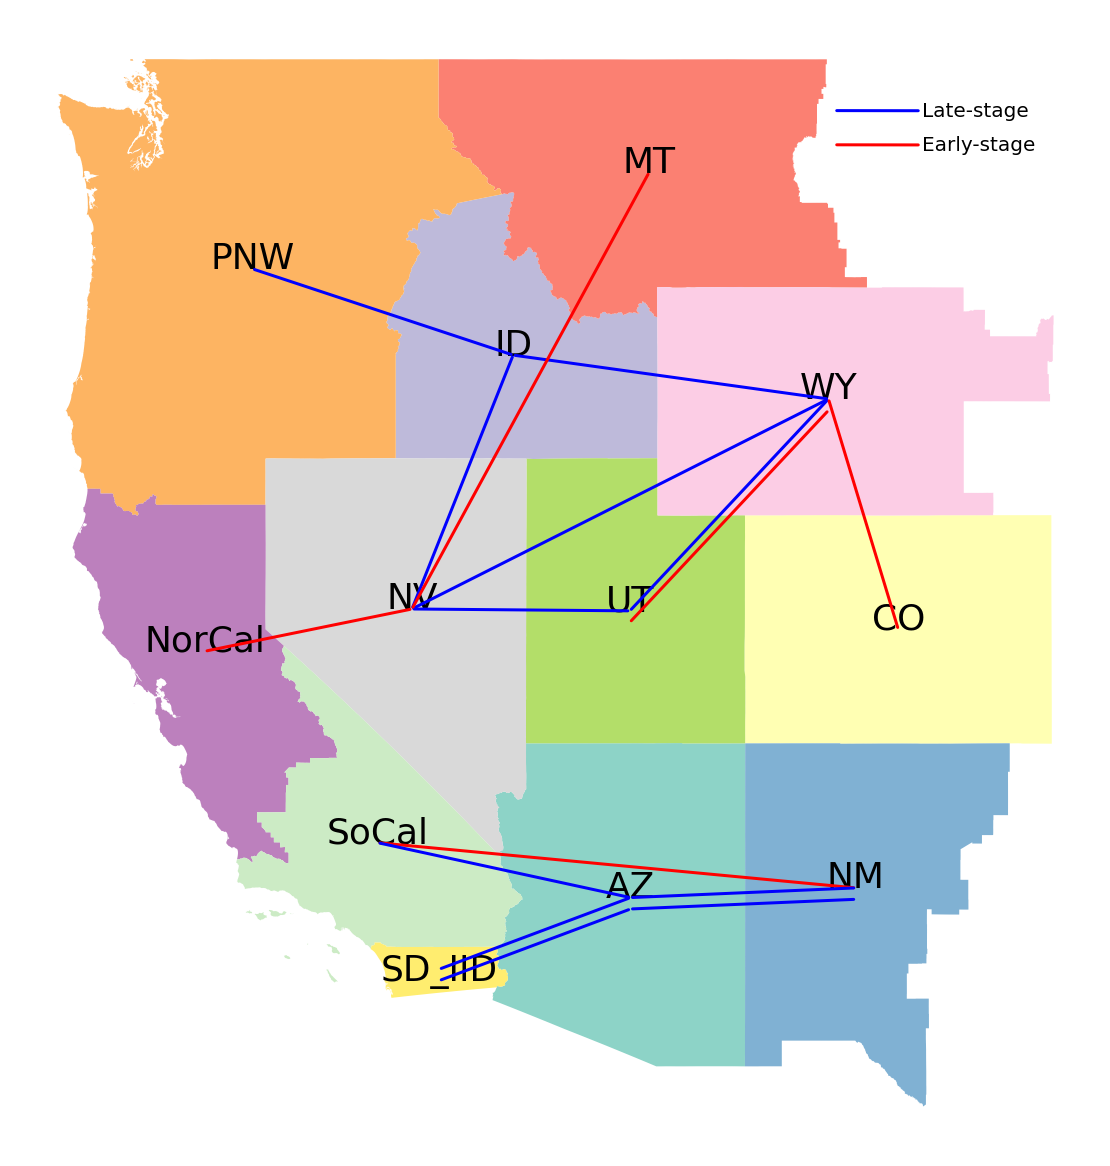

In [113]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 4, 4])
wecczone_shapes.plot(ax = ax, cmap = 'Set3', edgecolor = 'none')

ax.annotate("Late-stage", 
             xy = [-107, 48.1], 
             xytext = [-105, 48], 
             arrowprops = dict(arrowstyle = "-", lw = 3, color = "blue"),
             fontsize = 20)

ax.annotate("Early-stage", 
             xy = [-107, 47.5], 
             xytext = [-105, 47.4], 
             arrowprops = dict(arrowstyle = "-", lw = 3, color = "red"),
             fontsize = 20)

for xy, label in zip(wecczone_shapes.geometry, wecczone_shapes.Regions):
    if label != 'SD_IID':
        ax.annotate(label, xy = xy.centroid.coords[0], fontsize = 36, ha = 'center', color = 'black',
                     bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})
    else:
        ax.annotate(label, xy = (xy.centroid.coords[0][0], xy.centroid.coords[0][1] - 0.2), 
                    fontsize = 36, ha = 'center', color = 'black',
                    bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})
        
aznm_counter = 0
azsdiid_counter = 0
utwy_counter = 0
for index, row in proposed_status.iterrows():
    
    shrink_arrow, shrink_text = [0, 0], [0, 0]
    
    if (index.split('_')[0] != 'SD') & (index.split('_')[2] != 'SD'):
        start = index.split('_')[0]
        end = index.split('_')[2]
    
    if index.split('_')[0] == 'SD':
        start = str(index.split('_')[0] + '_' + index.split('_')[1])
        end = index.split('_')[3]
    elif index.split('_')[2] == 'SD':
        start = index.split('_')[0]
        end = str(index.split('_')[2] + '_' + index.split('_')[3])


    if (start == 'UT') & (end == 'WY'):
        utwy_counter = utwy_counter + 1
        if utwy_counter == 2:
            shrink_arrow, shrink_text = [0, -0.2], [0, -0.2]
    elif (start == 'AZ') & (end == 'NM'):
        aznm_counter = aznm_counter + 1
        if aznm_counter == 2:
            shrink_arrow, shrink_text = [0, -0.2], [0, -0.2]
    elif (start == 'AZ') & (end == 'SD_IID'):
        azsdiid_counter = azsdiid_counter + 1
        if azsdiid_counter == 2:
            shrink_arrow, shrink_text = [0, -0.2], [0, -0.2]
    
    if (row.Status == 'Very_likely') | (row.Status == 'Likely'):
        linec = 'blue'
    else:
        linec = 'red'
        
    ax.annotate("", 
                 xy = np.add(list(wecczone_shapes[wecczone_shapes.Regions == start]['geometry'].iloc[0].centroid.coords[0]), shrink_arrow), 
                 xytext = np.add(list(wecczone_shapes[wecczone_shapes.Regions == end]['geometry'].iloc[0].centroid.coords[0]), shrink_text),
                 arrowprops = dict(arrowstyle = "-", lw = 3, color = linec, mutation_scale = 100)
                )

ax.axis('off')

fig = fig.get_figure()
fig.savefig(os.path.join(resultpath, "../Transmission paper/proposed_lines.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

### Upgradable transmission lines

#### Existing

In [131]:
voltages_lines = pd.read_csv(os.path.join(inputfolder_2, "voltages_lines.csv"))

In [132]:
voltages_lines = voltages_lines.loc[:, voltages_lines.columns != 'Network_Lines']
voltages_lines = voltages_lines.set_index('transmission_path_name')
voltages_lines = voltages_lines.iloc[:-len(pronetwork)]

In [133]:
line_colors = ['gold', 'darkgreen', 'red', 'blue']
line_names = ['<365 kV AC', '365 kV AC', '500 kV AC', '500 kV DC']

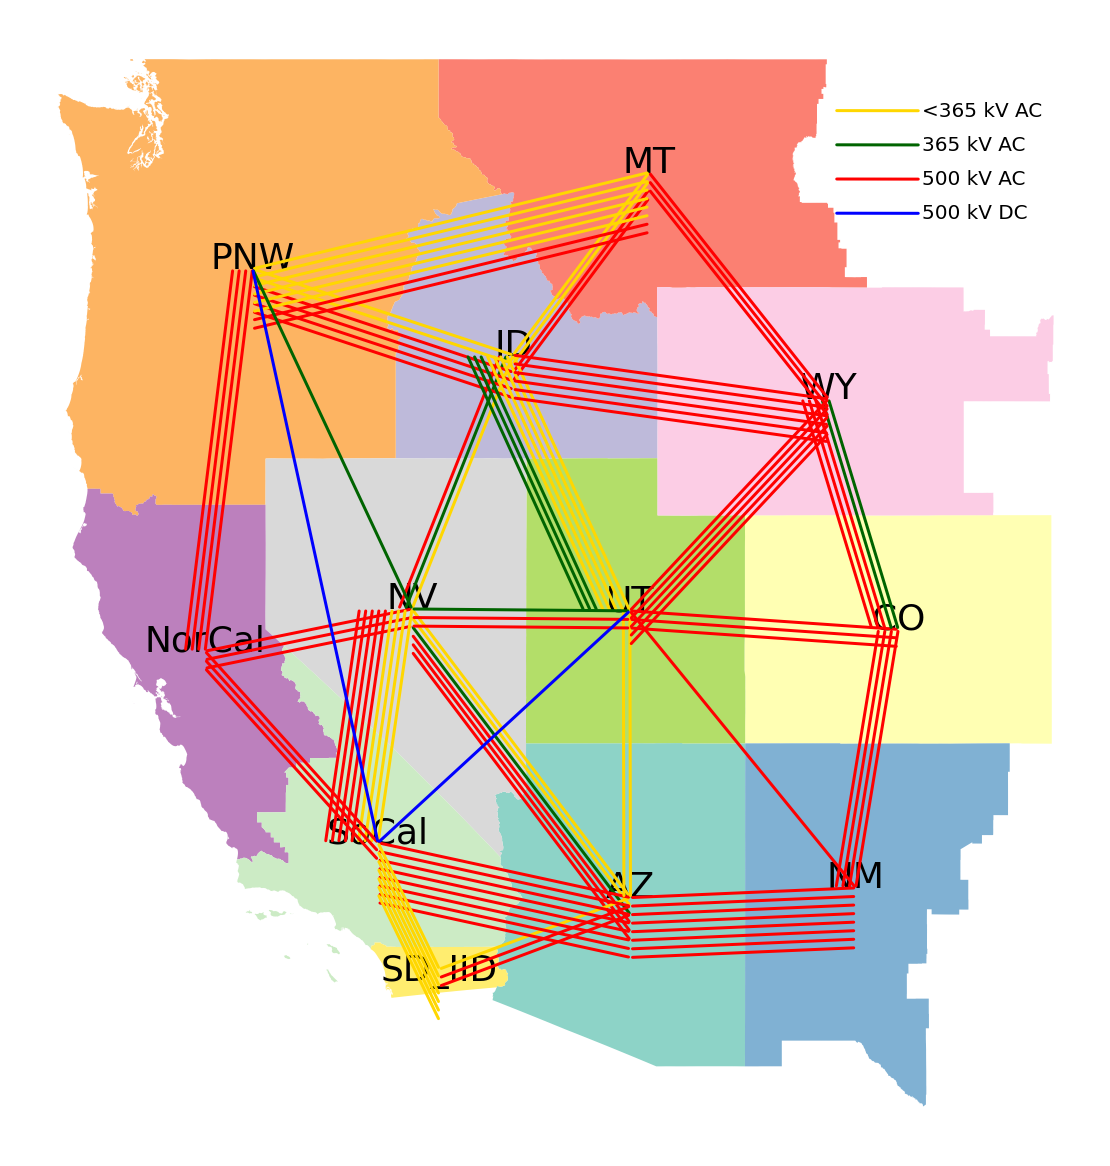

In [136]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 4, 4])
wecczone_shapes.plot(ax = ax, cmap = 'Set3', edgecolor = 'none')

for colnum, col in enumerate(voltages_lines.columns):
    ax.annotate(line_names[colnum], 
                 xy = [-107, 48.1 - (0.6 * colnum)], 
                 xytext = [-105, 48 - (0.6 * colnum)], 
                 arrowprops = dict(arrowstyle = "-", lw = 3, color = line_colors[colnum]),
                 fontsize = 20)

for xy, label in zip(wecczone_shapes.geometry, wecczone_shapes.Regions):
    if label != 'SD_IID':
        ax.annotate(label, xy = xy.centroid.coords[0], fontsize = 36, ha = 'center', color = 'black',
                     bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})
    else:
        ax.annotate(label, xy = (xy.centroid.coords[0][0], xy.centroid.coords[0][1] - 0.2), 
                    fontsize = 36, ha = 'center', color = 'black',
                    bbox = {'facecolor': 'white', 'alpha': 0, 'pad': 2, 'edgecolor': 'none'})
        
for index, row in voltages_lines.iterrows():
    
    line_counter = 0
    shrink_arrow, shrink_text = [0, 0], [0, 0]
    
    if (index.split('_')[0] != 'SD') & (index.split('_')[2] != 'SD'):
        start = index.split('_')[0]
        end = index.split('_')[2]
    
    if index.split('_')[0] == 'SD':
        start = str(index.split('_')[0] + '_' + index.split('_')[1])
        end = index.split('_')[3]
    elif index.split('_')[2] == 'SD':
        start = index.split('_')[0]
        end = str(index.split('_')[2] + '_' + index.split('_')[3])
    
    if ((start == 'NorCal') & (end == 'PNW')) | ((start == 'CO') & (end == 'WY')) | ((start == 'AZ') & (end == 'UT')) |((start == 'CO') & (end == 'NM')) | ((start == 'ID') & (end == 'NV')) | ((start == 'NV') & (end == 'SoCal')) | ((start == 'ID') & (end == 'UT')):
        shift_longitude, shift_latitude = -0.15, 0
    else:
        shift_longitude, shift_latitude = 0, -0.15
    
    for colnum, col in enumerate(voltages_lines.columns):
        for num in range(0, row[col]):
            ax.annotate("", 
                         xy = np.add(list(wecczone_shapes[wecczone_shapes.Regions == start]['geometry'].iloc[0].centroid.coords[0]), shrink_arrow), 
                         xytext = np.add(list(wecczone_shapes[wecczone_shapes.Regions == end]['geometry'].iloc[0].centroid.coords[0]), shrink_text),
                         arrowprops = dict(arrowstyle = "-", lw = 3, color = line_colors[colnum], mutation_scale = 100)
                        )
            line_counter = line_counter + 1
            shrink_arrow = [line_counter * shift_longitude, line_counter * shift_latitude]
            shrink_text = [line_counter * shift_longitude, line_counter * shift_latitude]

ax.axis('off')
            
fig = fig.get_figure()
fig.savefig(os.path.join(resultpath, "../Transmission paper/existing_lines_upgraded.pdf"), dpi = dpi_qual, bbox_inches = 'tight', pad_inches = 0)

#### Existing plus upgrades

In [134]:
from1to3 = numupgrade_nonlinear[(numupgrade_nonlinear.FromVol == 1) & (numupgrade_nonlinear.ToVol == 3)]
from1to3 = from1to3.rename(columns = {'Path':'transmission_path_name'})
from1to3 = from1to3.set_index('transmission_path_name')
from1to3 = from1to3[['OptVal']]

voltages_lines = pd.merge(voltages_lines, from1to3, how = 'outer', on = 'transmission_path_name')
voltages_lines = voltages_lines.fillna(0)
voltages_lines = voltages_lines.rename(columns = {'OptVal':'1_to_3'})

from2to3 = numupgrade_nonlinear[(numupgrade_nonlinear.FromVol == 2) & (numupgrade_nonlinear.ToVol == 3)]
from2to3 = from2to3.rename(columns = {'Path':'transmission_path_name'})
from2to3 = from2to3.set_index('transmission_path_name')
from2to3 = from2to3[['OptVal']]

voltages_lines = pd.merge(voltages_lines, from2to3, how = 'outer', on = 'transmission_path_name')
voltages_lines = voltages_lines.fillna(0)
voltages_lines = voltages_lines.rename(columns = {'OptVal':'2_to_3'})

In [135]:
voltages_lines['TwoH_AC'] = voltages_lines['TwoH_AC'] - voltages_lines['1_to_3']
voltages_lines['ThreeH_AC'] = voltages_lines['ThreeH_AC'] - voltages_lines['2_to_3']
voltages_lines['FiveH_AC'] = voltages_lines['FiveH_AC'] + voltages_lines['1_to_3'] + voltages_lines['2_to_3']
del voltages_lines['1_to_3']
del voltages_lines['2_to_3']
voltages_lines = voltages_lines.astype({"TwoH_AC": "int", "ThreeH_AC": "int", "FiveH_AC": "int", "FiveH_DC": "int"})